<a href="https://colab.research.google.com/github/forfourr/test-repo/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings('ignore')

import os
from os.path import join

###데이터 불러오기

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

data = wine.data
label = wine.target
col = wine.feature_names

In [ ]:
data_pd = pd.DataFrame(data, columns=col)
data_pd

### 데이터 전처리

In [ ]:
#MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [ ]:
data

In [ ]:
#차원의 축소(PCA)
#데이터의 개수는 적고 차원은 높기 때문에 밀도 낮은 데이터
from sklearn.decomposition import PCA
pca = PCA(n_components=2)       #2차원으로 축소소
data = pca.fit_transform(data)

In [ ]:
data

# Clustering

##k-means Clustering

In [ ]:
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=3)
Kmeans.fit(data)
#unsupervised는 train, test 나눌 필요가 없다!!


In [ ]:
cluster = Kmeans.predict(data)  #predicted label data

plt.scatter(data[:,0],   #x좌표
            data[:,1],   #y좌표
            c= cluster)

## Hierachical Clustering

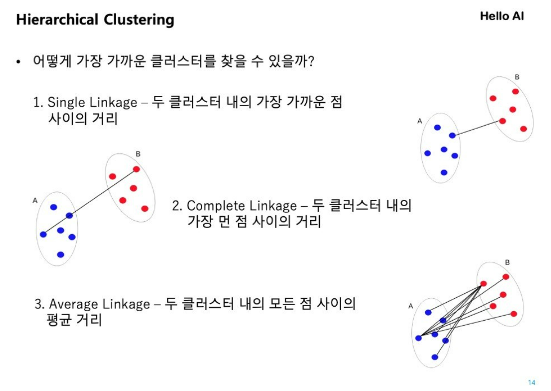

In [ ]:
#single
from sklearn.cluster import AgglomerativeClustering
single_cluster = AgglomerativeClustering(n_clusters=3,
                                         linkage ='single')

single_cluster.fit(data)
single_cluster = single_cluster.labels_

In [ ]:
plt.scatter(data[:,0],
            data[:,1],
            c= single_cluster)

In [ ]:
#complete
from sklearn.cluster import AgglomerativeClustering
com_clustering = AgglomerativeClustering(n_clusters=3,
                                         linkage ='complete')
com_clustering.fit(data)
com_cluster = com_clustering.labels_
plt.scatter(data[:,0],
            data[:,1],
            c= com_cluster)

In [ ]:
#average
from sklearn.cluster import AgglomerativeClustering
ave_cluster = AgglomerativeClustering(n_clusters=3,
                                         linkage ='average')

ave_cluster.fit(data)
ave_cluster = ave_cluster.labels_
plt.scatter(data[:,0],
            data[:,1],
            c= ave_cluster)

In [ ]:
#도식화 - 덴드로그램(dendrogram)
from scipy.cluster.hierarchy import dendrogram

# Hierarchical Cluster의 자식 노드
children = com_clustering.children_

distance = np.arange(children.shape[0])

# calculate the number of nodes include each stage of cluster
no_of_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

#draw dendrogram
dendrogram(linkage_matrix,
           p = len(data),
           labels = com_cluster,
           show_contracted=True,
           no_labels=True)

In [ ]:
#find out the best n of cluster - silhouette

from sklearn.metrics import silhouette_score

best_n = -1
best_score = -1

for n in range(2,11):
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(data)
    cluster = kmeans.predict(data, cluster)

    score = silhouette_score(data,cluster)
    print("count: {} score: {:.2f}".format(n,score))

    if(score > best_score):
        best_n = n
        best_score = score
print("<best>\n n:{}  score: {:.2f}".format(best_n, best_score))